### About Apriori Algorithm 

* Inventation 
> **Apriori is a seminal algorithm proposed by R. Agrawal and R. Srikant in 1994 for mining frequent itemsets for Boolean association rule**




* What is the Apriori Algorithm? 

**Apriori algorithm, a classic algorithm, is useful in mining frequent itemsets and relevant association rules. Usually, you operate this algorithm on a database containing a large number of transactions. One such example is the items customers buy at a supermarket.**

It helps the customers buy their items with ease, and enhances the sales performance of the departmental store.


* Apriori Algorithm – An Odd Name
>  **The name of the algorithm
is based on the fact that the algorithm uses prior knowledge of frequent itemset properties**



In [52]:

# import the needed libraries 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



!pip install squarify
import squarify
import seaborn as sns
import itertools
import datetime as dt
import time
plt.style.use('fivethirtyeight')


# for grocery store analysis
!pip install mlxtend --upgrade --no-deps
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


<a id='load'></a>
<h1 style="color:forestgreen" >2. Data</h1> 

In [53]:
df = pd.read_csv("/content/GroceryStoreDataSet.csv",names=['products'],header=None)
df

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [54]:
df.shape

(20, 1)

In [55]:
# head of the data (1st 5 values)
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [56]:
# tail of the data (lat 5 values)
df.tail()

,products
15,"COFFEE,SUGER,CORNFLAKES"
16,"BREAD,SUGER,BOURNVITA"
17,"BREAD,COFFEE,SUGER"
18,"BREAD,COFFEE,SUGER"
19,"TEA,MILK,COFFEE,CORNFLAKES"


In [57]:
#description of data
df.describe()

,products
count,20
unique,17
top,"BREAD,TEA,BOURNVITA"
freq,2


In [58]:
# figuring out the no. of null values
df.isnull().sum()

products    0
dtype: int64

In [59]:
df.dtypes

products    object
dtype: object

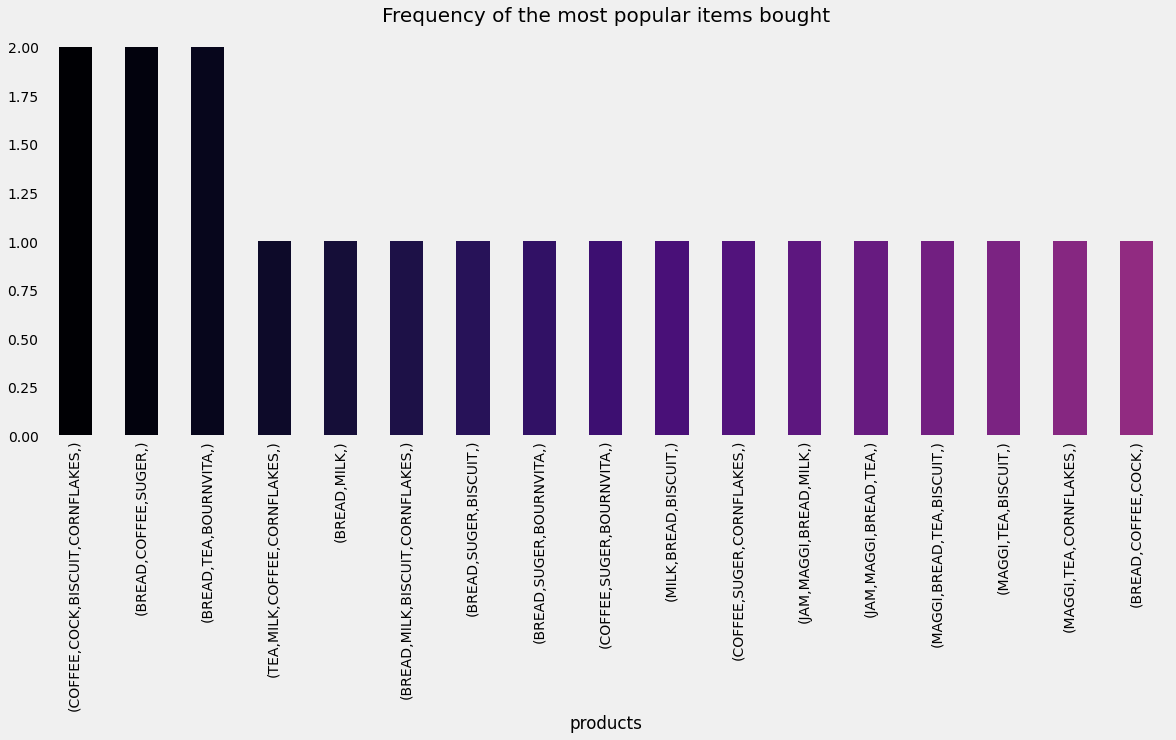

In [60]:
#  Frequency of the most popular items

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.magma(np.linspace(0, 1, 40))
df.value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of the most popular items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

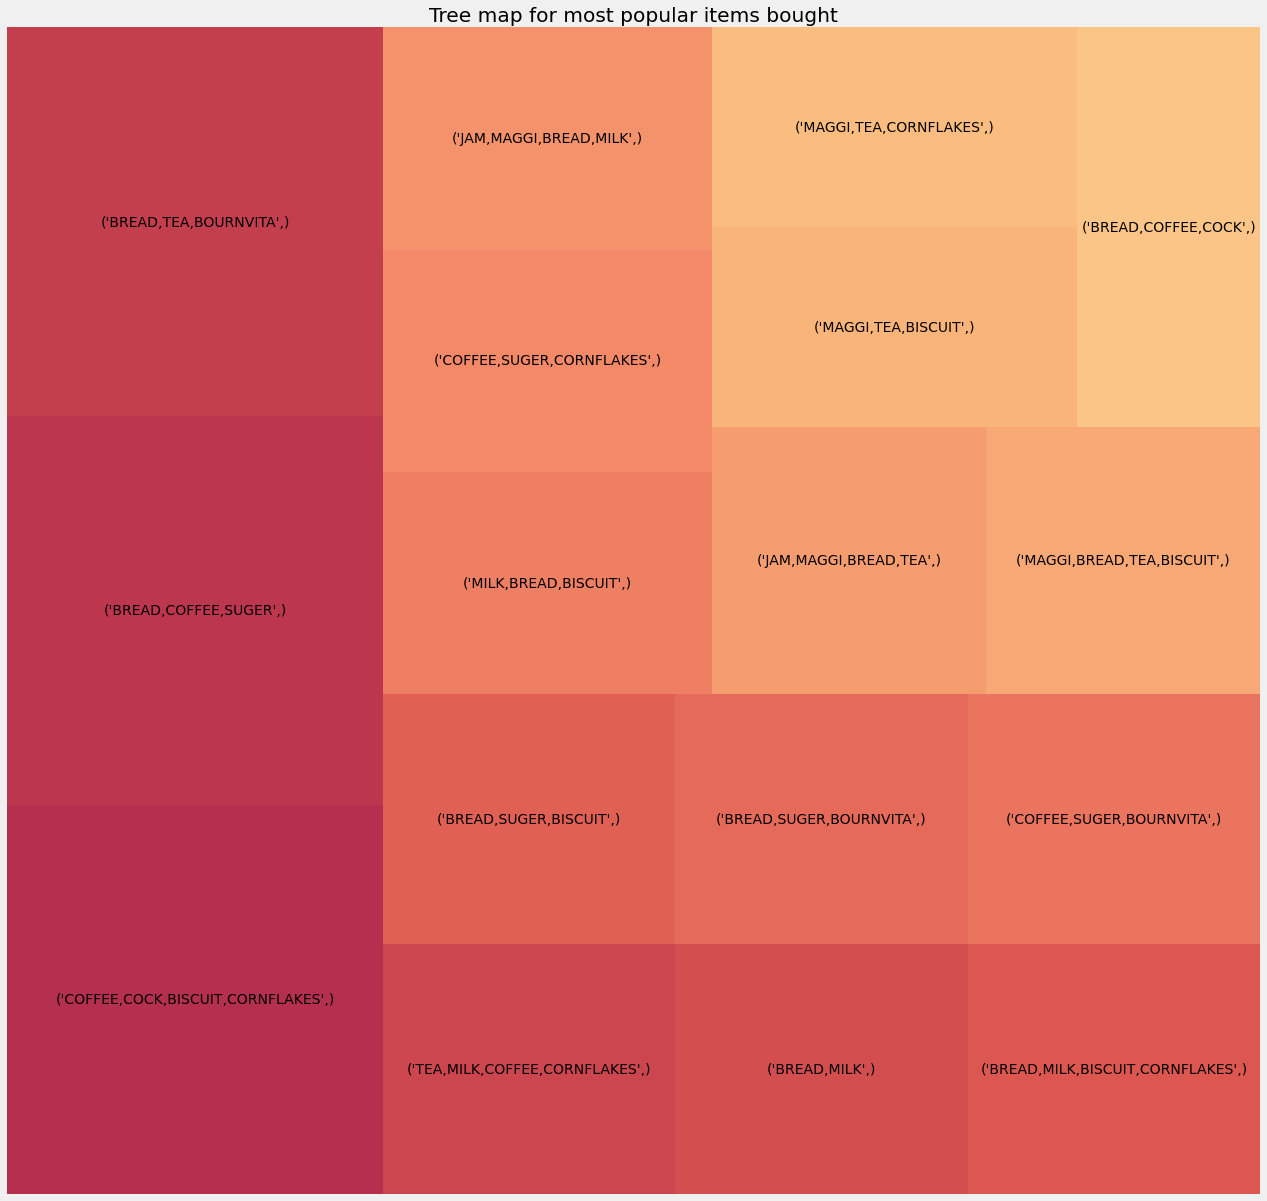

In [61]:
y = df.value_counts().head(50).to_frame()
y.index

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.RdYlGn(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree map for most popular items bought')
plt.axis('off')
plt.show()

<a id='tidydata'></a>
<h1 style="color:forestgreen" >3. Data Preprocessing</h1> 

In [62]:
data = list(df["products"].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)

df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


In [63]:
frequent_itemsets = apriori(df, min_support = 0.15, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
5,0.30,(CORNFLAKES),1
6,0.25,(MAGGI),1
7,0.25,(MILK),1
8,0.30,(SUGER),1
9,0.35,(TEA),1


In [64]:
# Find Frequency of Items
df.sum()

BISCUIT        7
BOURNVITA      4
BREAD         13
COCK           3
COFFEE         8
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64

In [65]:
# getting the item sets with length = 1 and support more than 15%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.15) ]

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
5,0.30,(CORNFLAKES),1
6,0.25,(MAGGI),1
7,0.25,(MILK),1
8,0.30,(SUGER),1
9,0.35,(TEA),1


In [67]:
# getting the item sets with length = 2 and support more than 15%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.15) ]

,support,itemsets,length
10,0.20,"(BISCUIT, BREAD)",2
11,0.15,"(CORNFLAKES, BISCUIT)",2
12,0.15,"(BREAD, BOURNVITA)",2
13,0.15,"(BREAD, COFFEE)",2
14,0.15,"(BREAD, MAGGI)",2
15,0.20,"(BREAD, MILK)",2
16,0.20,"(SUGER, BREAD)",2
17,0.20,"(BREAD, TEA)",2
18,0.15,"(COFFEE, COCK)",2
19,0.20,"(CORNFLAKES, COFFEE)",2


In [68]:
frequent_itemsets = apriori(df, min_support=0.05,use_colnames=True)
frequent_itemsets = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
frequent_itemsets[['antecedents','antecedent support','consequents','consequent support','confidence']]

,antecedents,antecedent support,consequents,consequent support,confidence
0,(BISCUIT),0.35,(BREAD),0.65,0.571429
1,(COCK),0.15,(BISCUIT),0.35,0.666667
2,(CORNFLAKES),0.30,(BISCUIT),0.35,0.500000
3,(BOURNVITA),0.20,(BREAD),0.65,0.750000
4,(BOURNVITA),0.20,(SUGER),0.30,0.500000
...,...,...,...,...,...
141,"(CORNFLAKES, TEA)",0.10,"(COFFEE, MILK)",0.05,0.500000
142,"(CORNFLAKES, MILK)",0.10,"(COFFEE, TEA)",0.05,0.500000
143,"(COFFEE, TEA)",0.05,"(CORNFLAKES, MILK)",0.10,1.000000
144,"(COFFEE, MILK)",0.05,"(CORNFLAKES, TEA)",0.10,1.000000


## FP Growth Algorithm

> FP growth algorithm adopts a divide-conquer strategy as follows : 

It compresses the database representing frequent items into a
frequent pattern tree(FP-tree) which retains the itemset association information. 

It
then divides the compressed database into a set of conditional databases each associated with one frequent item or “pattern fragment,” and
mines each database separately. 

In [70]:
frequent_itemset_elements  = fpgrowth(df, min_support = 0.1 ,use_colnames = True)

In [71]:
frequent_itemset_elements

,support,itemsets
0,0.65,(BREAD)
1,0.35,(BISCUIT)
2,0.25,(MILK)
3,0.30,(CORNFLAKES)
4,0.35,(TEA)
5,0.20,(BOURNVITA)
6,0.25,(MAGGI)
7,0.10,(JAM)
8,0.40,(COFFEE)
9,0.15,(COCK)


In [72]:
frequent_itemset_elements = fpgrowth(df, min_support=0.1,use_colnames=True)
frequent_itemset_elements = association_rules(frequent_itemset_elements, metric="confidence", min_threshold=0.5)
frequent_itemset_elements[['antecedents','antecedent support','consequents','consequent support','confidence']]

,antecedents,antecedent support,consequents,consequent support,confidence
0,(BISCUIT),0.35,(BREAD),0.65,0.571429
1,(MILK),0.25,(BREAD),0.65,0.800000
2,"(BISCUIT, BREAD)",0.20,(MILK),0.25,0.500000
3,"(BISCUIT, MILK)",0.10,(BREAD),0.65,1.000000
4,"(BREAD, MILK)",0.20,(BISCUIT),0.35,0.500000
...,...,...,...,...,...
61,(COFFEE),0.40,(SUGER),0.30,0.500000
62,(SUGER),0.30,(BREAD),0.65,0.666667
63,"(SUGER, BREAD)",0.20,(COFFEE),0.40,0.500000
64,"(SUGER, COFFEE)",0.20,(BREAD),0.65,0.500000
